In [43]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [44]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_NW_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,NaN,0.0,0.99539,-0.05889,0.85243,0.02306,0.83398,NaN,1.00000,0.03760,...,NaN,-0.51171,0.41078,NaN,0.21266,-0.34090,0.42267,NaN,0.18641,-0.45300
1,1.0,NaN,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,NaN,NaN,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1.0,0.0,1.00000,-0.03365,1.00000,0.00485,1.00000,NaN,NaN,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,NaN,0.60436,-0.24180,0.56045,NaN
3,NaN,NaN,1.00000,NaN,1.00000,1.00000,NaN,-1.00000,0.00000,0.00000,...,1.00000,NaN,0.51613,NaN,1.00000,-0.20099,0.25682,NaN,-0.32382,1.00000
4,1.0,0.0,NaN,-0.02401,0.94140,0.06531,0.92106,NaN,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,NaN,-0.05707,NaN,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,NaN,0.0,0.83508,0.08298,0.73739,-0.14706,0.84349,NaN,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,NaN,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1.0,0.0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,NaN,0.01606,...,0.94520,0.01361,NaN,0.04925,0.93159,NaN,0.94066,-0.00035,NaN,0.04712
348,1.0,0.0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,NaN,...,0.93988,0.03193,NaN,0.02542,0.92120,NaN,NaN,0.00442,NaN,-0.00577
349,1.0,NaN,0.90608,NaN,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,NaN,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [45]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	138
float64		column 2	68
float64		column 3	138
float64		column 4	138
float64		column 5	34
float64		column 6	34
float64		column 7	34
float64		column 8	70
float64		column 9	102
float64		column 10	34
float64		column 11	34
float64		column 12	104
float64		column 13	34
float64		column 14	70
float64		column 15	68
float64		column 16	0
float64		column 17	70
float64		column 18	34
float64		column 19	104
float64		column 20	36
float64		column 21	104
float64		column 22	34
float64		column 23	34
float64		column 24	68
float64		column 25	104
float64		column 26	68
float64		column 27	70
float64		column 28	104
float64		column 29	36
float64		column 30	70
float64		column 31	102
float64		column 32	70
float64		column 33	34
float64		column 34	104


In [46]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,213.000000,283.0,213.000000,213.000000,317.000000,317.000000,317.000000,281.000000,249.000000,317.000000,...,247.000000,283.000000,281.000000,247.000000,315.000000,281.000000,249.000000,281.000000,317.000000,247.000000
mean,0.910798,0.0,0.675906,0.031650,0.608528,0.103895,0.550685,0.085687,0.549393,0.178840,...,0.416941,-0.028077,0.570512,-0.057083,0.392955,-0.031104,0.362017,0.003069,0.350002,-0.021429
std,0.285706,0.0,0.418162,0.366935,0.509069,0.447026,0.490138,0.484304,0.442939,0.471661,...,0.507788,0.467873,0.476874,0.486399,0.559429,0.477500,0.511284,0.486758,0.507848,0.397990
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.512070,-0.028110,0.427840,-0.024230,0.256610,-0.051780,0.257950,-0.042860,...,0.030730,-0.218260,0.365470,-0.207305,0.000000,-0.222930,0.000000,-0.196810,0.000000,-0.110790
50%,1.000000,0.0,0.837890,0.011050,0.805620,0.022800,0.725820,0.011280,0.666670,0.023040,...,0.498040,-0.000500,0.698110,-0.017680,0.495380,0.000000,0.430260,0.000000,0.408210,0.000000
75%,1.000000,0.0,0.995390,0.130690,1.000000,0.267080,0.963650,0.279550,0.930510,0.489060,...,0.852000,0.163100,0.999890,0.112495,0.881220,0.098470,0.788590,0.147830,0.790150,0.090420
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

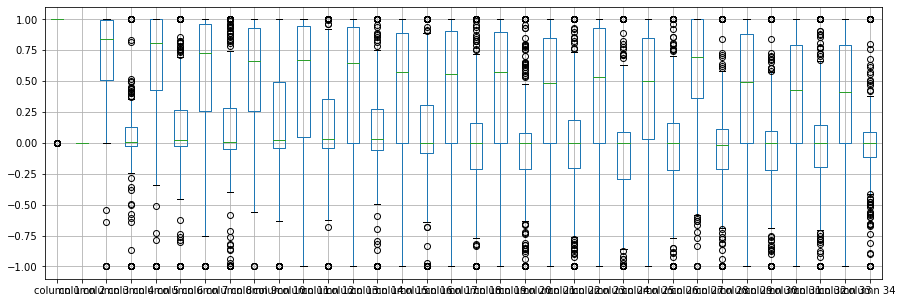

In [47]:
df.boxplot(return_type='axes', figsize=(15,5))

In [48]:
df.mean()

column 1     0.910798
column 2     0.000000
column 3     0.675906
column 4     0.031650
column 5     0.608528
column 6     0.103895
column 7     0.550685
column 8     0.085687
column 9     0.549393
column 10    0.178840
column 11    0.485531
column 12    0.131764
column 13    0.413770
column 14    0.087513
column 15    0.340102
column 16    0.071132
column 17    0.395619
column 18   -0.012429
column 19    0.417818
column 20   -0.040526
column 21    0.357904
column 22    0.012870
column 23    0.377573
column 24   -0.068373
column 25    0.416941
column 26   -0.028077
column 27    0.570512
column 28   -0.057083
column 29    0.392955
column 30   -0.031104
column 31    0.362017
column 32    0.003069
column 33    0.350002
column 34   -0.021429
dtype: float64

In [49]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.195585,0.039873,0.180913,0.176052,0.108435,0.049344,0.303151,-0.068348,...,-0.057832,0.118850,-0.186739,-0.047200,0.133639,-0.097649,0.159347,-0.111386,0.076502,0.076304
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.195585,NaN,1.000000,0.184994,0.455021,0.067309,0.362280,0.158696,0.283744,0.112669,...,0.278100,-0.085086,0.008529,-0.046174,0.458938,-0.108871,0.267277,0.049875,0.199485,0.160459
column 4,0.039873,NaN,0.184994,1.000000,0.135293,-0.080826,-0.078543,0.145546,-0.144420,0.135938,...,-0.052498,-0.224606,0.028859,0.058392,0.010862,0.401098,-0.115936,-0.004495,-0.139741,0.002667
column 5,0.180913,NaN,0.455021,0.135293,1.000000,0.036996,0.555926,0.027796,0.309754,-0.019699,...,0.310442,-0.043930,0.137548,0.117377,0.286473,-0.067086,0.228211,0.022529,0.289179,-0.036190
column 6,0.176052,NaN,0.067309,-0.080826,0.036996,1.000000,0.004841,0.266907,-0.262060,0.208879,...,-0.182832,0.030375,-0.182699,-0.023425,-0.040867,-0.140586,-0.149280,0.246415,-0.032318,0.264915
column 7,0.108435,NaN,0.362280,-0.078543,0.555926,0.004841,1.000000,-0.119937,0.402810,-0.071018,...,0.355094,0.086209,0.099352,0.179934,0.353950,-0.032997,0.350194,0.027191,0.492043,-0.061691
column 8,0.049344,NaN,0.158696,0.145546,0.027796,0.266907,-0.119937,1.000000,-0.248660,0.443816,...,-0.260998,-0.083467,-0.287472,-0.044404,-0.177302,0.082606,0.038786,0.089000,-0.190624,0.298364
column 9,0.303151,NaN,0.283744,-0.144420,0.309754,-0.262060,0.402810,-0.248660,1.000000,-0.240589,...,0.294515,0.112727,0.206846,0.218105,0.308906,-0.146762,0.184038,-0.050958,0.335614,-0.086543
column 10,-0.068348,NaN,0.112669,0.135938,-0.019699,0.208879,-0.071018,0.443816,-0.240589,1.000000,...,-0.229115,-0.019267,-0.224150,0.104265,-0.166118,0.038792,-0.118931,-0.002947,-0.208602,0.110052


In [50]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [51]:
imputer = md.Midas(layer_structure = [34,34+72,34+72+72,34+72+72+72,34+72+72+72+72,34+72+72+72,34+72+72,34+72,34], vae_layer = False, seed = 720)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 15.684343110947381
Epoch: 1 , loss: 15.59505067552839
Epoch: 2 , loss: 15.600165685017904
Epoch: 3 , loss: 15.424696286519369
Epoch: 4 , loss: 15.331838426135835
Epoch: 5 , loss: 15.377462432498024
Epoch: 6 , loss: 15.136909484863281
Epoch: 7 , loss: 14.958699544270834
Epoch: 8 , loss: 14.400926453726631
Epoch: 9 , loss: 13.792151587350029
Epoch: 10 , loss: 13.481828871227446
Epoch: 11 , loss: 13.62224038441976
Epoch: 12 , loss: 13.537508328755697
Epoch: 13 , loss: 13.603989828200568
Epoch: 14 , loss: 13.433493205479213
Epoch: 15 , loss: 13.339903831481934
Epoch: 16 , loss: 13.32004792349679
Epoch: 17 , loss: 13.522435188293457
Epoch: 18 , loss: 13.052794320242745
Epoch: 19 , loss: 13.253829547337123
Epoch: 20 , loss: 13.237039566040039
Epoch: 21 , loss: 13.232775188627697
Epoch: 22 , loss: 13.131380444481259
Epoch: 23 , loss: 13.253827367510114
Epoch: 24 , loss: 13.261200087411064
Epoch: 25 , loss: 13

In [52]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [53]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.111014
column 2     0.000000
column 3     1.000000
column 4     0.003301
column 5     0.000000
column 6     0.000000
column 7     0.000000
column 8     0.000000
column 9    -0.095727
column 10   -1.000000
column 11    0.000000
column 12    0.000000
column 13    0.000000
column 14    0.010111
column 15   -0.120585
column 16   -1.000000
column 17   -1.000000
column 18   -1.000000
column 19   -0.105457
column 20    1.000000
column 21   -1.000000
column 22    1.000000
column 23    0.000000
column 24    0.000000
column 25    0.000000
column 26    0.000000
column 27    1.000000
column 28   -1.000000
column 29   -1.000000
column 30    1.000000
column 31   -0.068867
column 32   -0.005603
column 33   -1.000000
column 34    1.000000
Name: 21, dtype: float64

In [54]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [55]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,-0.266772,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.379512,0.000000,0.000000,...,-0.069028,0.000000,0.000000,0.442113,0.000000,0.000000,0.000000,0.549233,0.000000,0.000000
1,0.000000,-0.000367,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.472874,0.264304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.120141,-0.290004,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.173804,0.000000,0.000000,0.000000,0.370424
3,-1.022850,0.000058,0.000000,0.457560,0.0,0.0,-0.734075,0.000000,0.000000,0.000000,...,0.000000,-0.913966,0.000000,-1.007954,0.000000,0.000000,0.000000,-1.003590,0.000000,0.000000
4,0.000000,0.000000,-0.542862,0.000000,0.0,0.0,0.000000,0.240231,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.610119,0.000000,0.605089,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,-0.175585,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.053955,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.444333,0.000000,0.000000,0.000000,0.000000,0.000000
347,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-0.481073,0.000000,...,0.000000,0.000000,-0.480142,0.000000,0.000000,-0.084946,0.000000,0.000000,-0.573984,0.000000
348,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.014688,...,0.000000,0.000000,-0.435219,0.000000,0.000000,-0.018432,-0.590354,0.000000,-0.558391,0.000000
349,0.000000,0.000659,0.000000,0.048322,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,-0.502157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [56]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [57]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [58]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

29.11008603182284

In [59]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [60]:
NRMS=numerator/denominator
NRMS


0.4252120076519816

In [61]:
new_df.iloc[66,:]

column 1     1.000000
column 2     0.000000
column 3     1.035183
column 4     0.280460
column 5     1.000000
column 6     0.024770
column 7     1.025146
column 8     0.077640
column 9     1.000000
column 10    0.043170
column 11    0.987620
column 12    0.332660
column 13    1.000000
column 14    0.054890
column 15    1.000000
column 16    0.043840
column 17    0.957500
column 18   -0.245980
column 19    0.843710
column 20   -0.086680
column 21    1.000000
column 22    0.041500
column 23    0.999330
column 24    0.273760
column 25    0.835141
column 26   -0.014631
column 27    0.964140
column 28   -0.021740
column 29    0.867470
column 30    0.233600
column 31    0.753250
column 32   -0.220210
column 33    0.803550
column 34   -0.073290
Name: 66, dtype: float64

In [62]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.733228,0.000000,0.995390,-0.058890,0.85243,0.02306,0.833980,0.002432,1.000000,0.037600,...,0.499082,-0.511710,0.410780,-0.019567,0.212660,-0.340900,0.422670,0.004363,0.186410,-0.453000
1,1.000000,-0.000367,1.000000,-0.188290,0.93035,-0.36156,-0.108680,-0.935970,1.000000,-0.045490,...,0.269554,-0.001386,-0.204680,-0.184010,-0.190400,-0.115930,-0.166260,-0.062880,-0.137380,-0.024470
2,1.000000,0.000000,1.000000,-0.033650,1.00000,0.00485,1.000000,-0.000479,0.599646,0.011980,...,0.575280,-0.402200,0.589840,-0.221450,0.431000,0.000154,0.604360,-0.241800,0.560450,-0.011956
3,-0.022850,0.000058,1.000000,0.005950,1.00000,1.00000,-0.021915,-1.000000,0.000000,0.000000,...,1.000000,-0.007016,0.516130,-0.007954,1.000000,-0.200990,0.256820,-0.003590,-0.323820,1.000000
4,1.000000,0.000000,0.457138,-0.024010,0.94140,0.06531,0.921060,0.007681,0.771520,-0.163990,...,0.032860,-0.651580,0.132900,-0.532060,0.024310,-0.011851,-0.057070,0.009359,-0.046080,-0.656970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.824415,0.000000,0.835080,0.082980,0.73739,-0.14706,0.843490,-0.001715,0.904410,-0.046220,...,0.953780,-0.042020,0.834790,0.001230,0.555667,0.128150,0.866600,-0.107140,0.905460,-0.043070
347,1.000000,0.000000,0.951130,0.004190,0.95183,-0.02723,0.934380,-0.019200,0.464827,0.016060,...,0.945200,0.013610,0.455078,0.049250,0.931590,-0.003266,0.940660,-0.000350,0.340846,0.047120
348,1.000000,0.000000,0.947010,-0.000340,0.93207,-0.03227,0.951770,-0.034310,0.955840,0.039148,...,0.939880,0.031930,0.489671,0.025420,0.921200,0.003988,0.334236,0.004420,0.368579,-0.005770
349,1.000000,0.000659,0.906080,0.031752,0.98122,-0.01989,0.956910,-0.036460,0.857460,0.001100,...,0.408343,-0.020990,0.891470,-0.077600,0.829830,-0.172380,0.960220,-0.037570,0.874030,-0.162430


In [63]:
imputations[-1].to_excel("Ionosphere_NW_20(imp).xlsx", index=False, header=False)